In [2]:
import requests
import re
from bs4 import BeautifulSoup


In [3]:
def get_converted_price(price):
    converted_price = float(re.sub(r"[^\d.]", "", price))
    return converted_price

In [4]:
def extract_url(url):

    if url.find("www.amazon.in") != -1:
        index = url.find("/dp/")
        if index != -1:
            index2 = index + 14
            url = "https://www.amazon.in" + url[index:index2]
        else:
            index = url.find("/gp/")
            if index != -1:
                index2 = index + 22
                url = "https://www.amazon.in" + url[index:index2]
            else:
                url = None
    else:
        url = None
    return url


In [5]:
url=extract_url('https://www.amazon.in/Fossil-Grant-Chronograph-Black-Watch-FS4813/dp/B00AFTTQ8I/ref=sr_1_1_sspa?dchild=1&keywords=watch&qid=1615643196&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUFNWjVFNEZOMENaUUMmZW5jcnlwdGVkSWQ9QTAzMDg5MzAzSUhBOVc0STNVVUgmZW5jcnlwdGVkQWRJZD1BMDk1MDE4NzFQNzcwTU5DS0JFTEYmd2lkZ2V0TmFtZT1zcF9hdGYmYWN0aW9uPWNsaWNrUmVkaXJlY3QmZG9Ob3RMb2dDbGljaz10cnVl')
url

In [6]:
headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0"
}
_url = extract_url(url)
page = requests.get(_url, headers=headers)
page

<Response [200]>

In [7]:
soup = BeautifulSoup(page.content, "html5lib")

In [8]:
details = {"name": "", "price": 0, "deal": True, "url": ""}

title = soup.find(id="productTitle")
title.text

"\n\n\n\n\n\n\n\nFossil Men's Analogue Black Dial Watch\n\n\n\n\n\n\n"

In [9]:
price = soup.find(id="priceblock_dealprice")
if price is None:
    price = soup.find(id="priceblock_ourprice")
    details["deal"] = False
# stock = soup.find(id='outOfStock').find('span',{'class':'a-text-bold'})
# print(stock.text.strip())

In [10]:
if title is not None and price is not None:
    details["name"] = title.get_text().strip()
    details["price"] = get_converted_price(price.get_text())
    details["url"] = _url
print(details)

{'name': "Fossil Men's Analogue Black Dial Watch", 'price': 7995.0, 'deal': False, 'url': 'https://www.amazon.in/dp/B00AFTTQ8I'}


In [24]:
import time

def extract_data(url):
    
    # blank dict
    details = {"name": "", "price": 0, "deal": True, "url": ""}
    
    # fake header
    headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0"
    }

    # get clean url
    _url = extract_url(url)
    page = requests.get(_url, headers=headers)
    soup = BeautifulSoup(page.content, "html5lib")
    # get data
    title = soup.find(id="productTitle")
    price = soup.find(id="priceblock_dealprice")
    if price is None:
        price = soup.find(id="priceblock_ourprice")
        details["deal"] = False
    
    # if data is collected
    if title is not None and price is not None:
        details["name"] = title.get_text().strip()
        details["price"] = get_converted_price(price.get_text())
        details["url"] = _url
    return details

def run_tracker(product_url):
    details = extract_data(product_url)
    print('tracking product')
    time.sleep(3) 
    print(details)
    print('-------')
    return details

In [22]:
run_tracker("https://www.amazon.in/Noise-Colorfit-Pro-Touch-Control/dp/B07YY1BY5B/ref=sr_1_6_mod_primary_lightning_deal?dchild=1&keywords=watch&qid=1615643196&sbo=Tc8eqSFhUl4VwMzbE4fw%2Fw%3D%3D&smid=A14CZOWI0VEHLG&sr=8-6")

waiting
{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black', 'price': 2499.0, 'deal': True, 'url': 'https://www.amazon.in/dp/B07YY1BY5B'}
-------


{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black',
 'price': 2499.0,
 'deal': True,
 'url': 'https://www.amazon.in/dp/B07YY1BY5B'}

In [25]:
tracker_data = []

url = 'https://www.amazon.in/Noise-Colorfit-Pro-Touch-Control/dp/B07YY1BY5B/ref=sr_1_6_mod_primary_lightning_deal?dchild=1&keywords=watch&qid=1615643196&sbo=Tc8eqSFhUl4VwMzbE4fw%2Fw%3D%3D&smid=A14CZOWI0VEHLG&sr=8-6'
for i in range(100):
    tracker_data.append(run_tracker(url))


    

tracking product
{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black', 'price': 2499.0, 'deal': True, 'url': 'https://www.amazon.in/dp/B07YY1BY5B'}
-------
tracking product
{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black', 'price': 2499.0, 'deal': True, 'url': 'https://www.amazon.in/dp/B07YY1BY5B'}
-------
tracking product
{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black', 'price': 2499.0, 'deal': True, 'url': 'https://www.amazon.in/dp/B07YY1BY5B'}
-------
tracking product
{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black', 'price': 2499.0, 'deal': True, 'url': 'https://www.amazon.in/dp/B07YY1BY5B'}
-------
tracking product
{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black', 'price': 2499.0, 'deal': True, 'url': 'https://www.amazon.in/dp/B07YY1BY5B'}
-------
tracking product
{'name': 'Noise Colorfit Pro 2 Full Touch Control Smart Watch Jet Black', 'price': 2499.0, 'deal': True

In [26]:
import pandas as pd

In [28]:
df = pd.DataFrame(tracker_data)

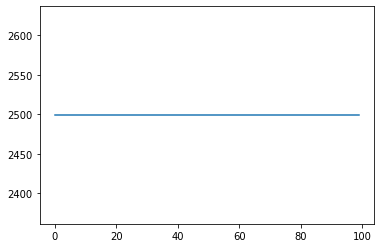

In [29]:
df['price'].plot()